In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Traditional Ecological Knowledge

Indigenous people are the people who have inhabited a land area from the earliest times, before colonization, and have a way of life that is *inextricably linked* to that land. Over many thousands of years and more, indegenous folks learn and pass down wisdom about how humans can best support the local ecosystem they are a part of and depend on. This wisdom is sometimes called "Traditional Ecological Knowledge" (TEK). Invasion by colonization across the world has caused many genocides of indigenous people and their lands, and has attempted to erase indigenous culture and TEK. Watch [this video](https://www.youtube.com/watch?v=T-azcPugmKQ) to see the impacts of colonialism on indigenous peoples here and discuss the following question:

**Discussion Question 1:** What are the ways that colonialism harmed/harms the indigenous people of our region?

"Western" science (like you are learning in this class) has been dominated by folks from colonialist cultures. It is a very young culture compared to indigenous culture, and it is perhaps not surprising that recent scientific studies are relearning the lessons of the much older indigenous wisdom. Watch [this video](https://www.youtube.com/watch?v=wlzDJQjjQDg) about indigenous cultural burning and wildfire management to answer the following question. 

**Discussion Question 2:** How do prescribed burns help with wildfire management?

In addition to protecting people and the ecosystems we are part of from dangerous wildfires, perscribed burns are needed for cultural resources that are essential to the Karuk and Yurok way of life. For this reason, Karuk and Yurok people (and many others indigenous peoples) refer to their prescribed fire as *cultural burns* that are central to subsistence and ceremonial practices. The term *cultural burning* distinguishes these fires from the fuel reduction-focused *prescribed burns* of public land agencies whose primary objective is to reduce fuel loads and moderate wildfire intensity. One of the ways cultural burns are central to Karuk and Yurok way of life, is that they provide more hazelnut stems that are needed for *basket weaving*, which we will learn more about in this activity.

**Discussion Question 3:** Why do Karuk and Yurok people prefer to call their prescribed burning practices "cultural burns"?

# Hazelnut Stems for Basketweaving
Baskets weaved from *hazelnut stems* have many uses in Karuk and Yurok culture, including (but not limited to) baby cradles, clothing, and food preparation. Here is a hopper basket used to pound acorns. The stems on the left side of the picture are unpeeled, whereas and peeled hazelnut basketry stems are shown on the right. This basket is composed of peeled hazelnut stems along with other materials. 

<img src="Basket.jpg" alt="drawing" width="300"/>

Skilled basketweavers gather the stems and braid the baskets. Here is a picture of Karuk basketweavers Janet Morehead (left) and Lillian Rentz (right), peeling and evaluating the quality of hazelnut stems they gathered.

<img src="Basketweavers.jpg" alt="drawing" width="400"/>

These basketweavers generously participated in a scientific study that compared the effect of different burn treatments on how hazelnut shrubs produce basket-worthy stems. Additional basketweavers involved in the study include Elizabeth Azzuz, Laverne Glaze, Chook-Chook Hillman, Lisa Hillman, Robert McConnell,Robert McConnell Jr., Kathy McCovey, Bertha Peters, Maggie Peters, Verna Reece, Margo Robbins, Brittany Souza, and Bill Tripp.

# Comparing Burn Treatments for Basket-Worthy Stem Production

We will look at some data from this study [Effects of understory fire management treatments on California Hazelnut, an ecocultural resource of the Karuk and Yurok Indians in the Pacific Northwest](https://www.sciencedirect.com/science/article/pii/S0378112719306826) published in *Forest Ecology and Managment* in 2019. 

Skilled basketweavers (and scientists trained by the skilled basketweavers) collected basket-worthy stems from many different hazelnut shrubs that each received a "treatment". One of the "treatments" was a "broadcast burn" which is the type of cultural burn that the Yurok and Karuk people prefer to use as part of their basketweaving traditions. Another "treatment" was a "control" which meant the shrub was left untouched. Stems were gathered before treatment and then again after a full growing season since the treatment. 

The Study Location (yellow star in the intersection of Karuk and Yurok Ancentral Lands) is shown on the map below.

<img src="AncestralTerritory.jpg" alt="drawing" width="700"/>

 Let's have a look at a table of the data...

In [3]:
bb = Table.read_table('Basketweaving_and_Burning.csv')

In [4]:
bb

ShrubNumber,PreBasketStems,PostBasketStems,Treatment
84,11,1,Control
89,20,1,Control
99,13,0,Control
103,2,0,Control
108,13,0,Control
111,10,0,Control
114,6,3,Control
119,11,3,Control
137,18,0,Control
148,0,7,Control


**Discussion Question 4:** Were there more shrubs that experienced the "Broadcast" treatment or the "Control" treatment? How would you manipulate the table to figure this out?



In [5]:
bb.group('Treatment')

Treatment,count
Broadcast,41
Control,19


Let's plot the data to visualize it. We will plot the control treatment data using a slightly larger marker than the broadcast burn treatment data in case those data points end up falling on top of each other. We will also plot the data points with some transparency in case the data points within a treatment class fall on top of themselves.

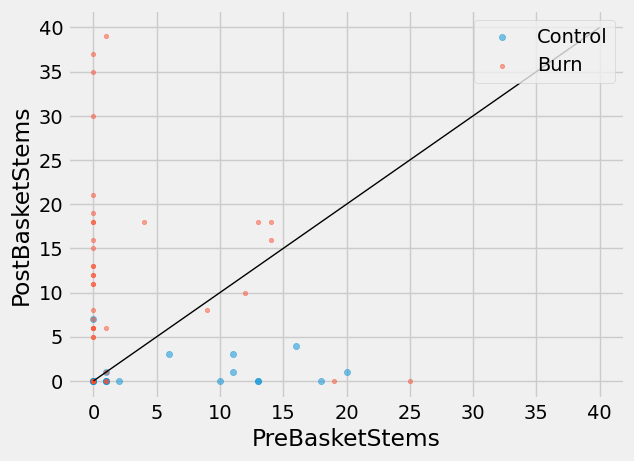

In [6]:
bb_control = bb.where('Treatment', are.equal_to('Control'))
bb_burn = bb.where('Treatment', are.equal_to('Broadcast'))
plots.plot([0,40],[0,40],'k-',linewidth=1)
plots.scatter(bb_control.column('PreBasketStems'),bb_control.column('PostBasketStems'),s=20,alpha=0.5,label='Control')
plots.scatter(bb_burn.column('PreBasketStems'),bb_burn.column('PostBasketStems'),s=10,alpha=0.5,label='Burn')
plots.xlabel('PreBasketStems')
plots.ylabel('PostBasketStems')
plots.legend(loc='upper right')

Use the plot above to answer the following discussion questions:

**Discussion Question 5:** What is plotted on the *x*-axis?

**Discussion Question 6:** What is plotted on the *y*-axis?

**Discussion Question 7:** What do the *blue* dots represent?

**Discussion Question 8:** What do the *red* dots represent?

**Discussion Question 9:** What does the *black line* represent?

**Discussion Question 10:** Take a look at the two burned shrubs that started out with the most basket-worthy stems. (Red dots with the two largest x-values.) How many basket-worthy stems grew on those shrubs after the burn treatment? What do you think happened to those shrubs?

**Discussion Question 11:** Are there any blue dots above the black line? How does this compare to the red dots? What does this mean?

If you are curious about which datapoints fell on top of each other in the above plot, you can count them using the group function. First we look at the control data:

In [6]:
bb_control.group(['PreBasketStems','PostBasketStems'])

PreBasketStems,PostBasketStems,count
0,0,4
0,7,1
1,0,3
1,1,1
2,0,1
6,3,1
10,0,1
11,1,1
11,3,1
13,0,2


And then we can look at the same thing in the broadcast burn data:

In [7]:
bb_burn.group(['PreBasketStems','PostBasketStems'])

PreBasketStems,PostBasketStems,count
0,0,6
0,5,2
0,6,3
0,7,1
0,8,1
0,11,2
0,12,2
0,13,2
0,15,1
0,16,1


But perhaps it makes more sense to look at how many basket-worthy stems were on the shrubs after treatment RELATIVE to how many basket-worthy stems they started out with...

In [8]:
bb = bb.with_column('BasketStemDiff',bb.column('PostBasketStems')-bb.column('PreBasketStems'))
stemdiff_and_treatment = bb.select('BasketStemDiff', 'Treatment')

In [9]:
bb

ShrubNumber,PreBasketStems,PostBasketStems,Treatment,BasketStemDiff
84,11,1,Control,-10
89,20,1,Control,-19
99,13,0,Control,-13
103,2,0,Control,-2
108,13,0,Control,-13
111,10,0,Control,-10
114,6,3,Control,-3
119,11,3,Control,-8
137,18,0,Control,-18
148,0,7,Control,7


Now we have added a new column showing the difference in basket-worthy stems before and after treatment. Now let's use that new column to make a histogram, where we separate out the data by treatment. We have use some transparency because the data from each treatment sometimes overlap.

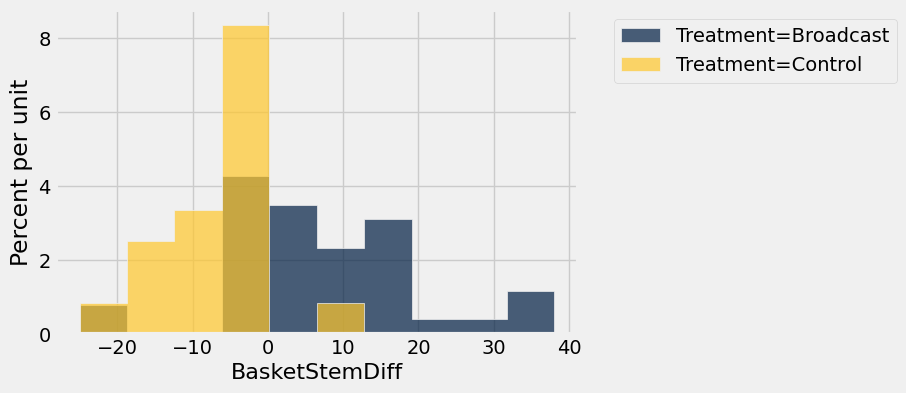

In [10]:
stemdiff_and_treatment.hist('BasketStemDiff', group='Treatment')

**Discussion Question 12:** What does a negative number on the x-axis mean?

**Discussion Question 13:** What does the small lonely blue bar on the far left (x~=-20) represent?

**Discussion Question 14:** Is each distribution symmetric? (Consider yellow and blue separately) 

**Discussion Question 15:** Does it seem clear to you that one distribution is in general weighted farther to the right than the other? If so, which treatment seems best for creating more basket-worthy stems?

# Chance Variation?
This raises the question of whether the difference in the distributions reflects just chance variation or a difference in the distributions in the larger shrub population. Could it be that there is no difference between the two distributions in the shrub population, but we are seeing a difference in the samples just because of the shrubs that happened to be selected?

We can try to answer this question by a test of hypotheses. 

**Discussion Question 16:** State the *null hypothesis*, in your own words.

**Discussion Question 17:** State the *alternative hypothesis*, in your own words.

**Discussion Question 18:** What *test statistic* should we use to test the null hypothesis?

# Test Statistic

Let's compute our test statistic. 

In [11]:
means_table = bb.select(['Treatment','BasketStemDiff']).group('Treatment', np.average)
means_table

Treatment,BasketStemDiff average
Broadcast,8.36585
Control,-5.47368


In [12]:
means = means_table.column(1)
observed_difference = means.item(0) - means.item(1)
observed_difference

13.839537869062902

**Discussion Question 19:** Based on how we have coded this, what values of our statistic are in favor of the alternative: positive or negative?

Now let's create a function that can quickly calculate the test statistic for us. (It should do the same thing we just did above.)

In [13]:
def difference_of_means(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    # array of group means
    means = means_table.column(1)
    
    return means.item(0) - means.item(1)

In [14]:
difference_of_means(bb,'BasketStemDiff', 'Treatment')

13.839537869062902

Now how do we use this test statitic?

To see how the statistic should vary under the null hypothesis, we have to figure out how to simulate the statistic under that hypothesis. A clever method based on random permutations does just that.

If there were no difference between the two distributions in the underlying population, then whether a shrub was burned should make no difference to the average. The idea, then, is to shuffle all the treatment labels randomly among the shrubs. This is called random permutation. Let's use a simple example to see how this works...

# Random Permutation (Shuffling)

In [15]:
letters = Table().with_column('Letter', make_array('a', 'b', 'c', 'd', 'e'))

In [16]:
letters.sample()

Letter
b
c
d
c
e


In [17]:
letters.sample(with_replacement = False)

Letter
d
a
c
b
e


In [18]:
letters.with_column('Shuffled', letters.sample(with_replacement = False).column(0))

Letter,Shuffled
a,d
b,e
c,c
d,b
e,a


Once we have created a shuffled dataset, we again take the difference of the two new group means: the mean basket stem difference from shrubs labeled as burned and the mean basket stem difference from the shrubs that have been randomly labeled as a control. This is a simulated value of the test statistic under the null hypothesis.

# Simulation Under Null Hypothesis

Let's create a new table with just the Basket Stem Difference and the Treatment label. 

In [19]:
stemdiff_and_treatment = bb.select('BasketStemDiff','Treatment')

Then add a column of to our table with the shuffled treatment labels

In [20]:
shuffled_labels = stemdiff_and_treatment.sample(with_replacement=False).column('Treatment')

In [21]:
original_and_shuffled = stemdiff_and_treatment.with_column('Shuffled Label', shuffled_labels)

In [22]:
original_and_shuffled

BasketStemDiff,Treatment,Shuffled Label
-10,Control,Control
-19,Control,Broadcast
-13,Control,Broadcast
-2,Control,Control
-13,Control,Broadcast
-10,Control,Broadcast
-3,Control,Broadcast
-8,Control,Control
-18,Control,Broadcast
7,Control,Broadcast


Now we look at the difference of the group means...

In [23]:
difference_of_means(original_and_shuffled, 'BasketStemDiff', 'Shuffled Label')

-0.3324775353016687

Recall that this was the difference of the group means that we actually observed.

In [24]:
difference_of_means(original_and_shuffled, 'BasketStemDiff', 'Treatment')

13.839537869062902

**Discussion Question 20:** How does this test statistic under the null hypothesis compare to the value of the test statistic that you found in the real observations?

But we only shuffled the labels once. Could a different shuffle have resulted in a larger difference between the group averages? To get a sense of the variability, we must simulate the difference many times. Let's shuffle them a bunch of times to get an estimate of the *distribution* of the test statistic under the null for each shuffling that we perform...

# Permutation Test

We will start by defining a function that simulates one value of the test statistic under the null hypothesis. This is just a matter of collecting the code that we wrote above.

In [25]:
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column('Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, label, 'Shuffled Label')   

Run the cell below multiple times to see how the test statistic varies under the null hypothesis:

In [26]:
one_simulated_difference(stemdiff_and_treatment, 'BasketStemDiff', 'Treatment')

6.7535301668806165

**Discussion Question 21:** How do these values of the test statistic under the null hypothesis compare to the value of the test statistic that you found in the real observations? 

Recall the real observations looked like this:

In [27]:
difference_of_means(bb,'BasketStemDiff', 'Treatment')

13.839537869062902

Now let's collect the test statistic from bunch of these null simulations to look at the distribution of these values...

In [28]:
differences = make_array()

for i in np.arange(2500):
    new_difference = one_simulated_difference(stemdiff_and_treatment, 'BasketStemDiff', 'Treatment')
    differences = np.append(differences, new_difference)

Observed Difference: 13.839537869062902


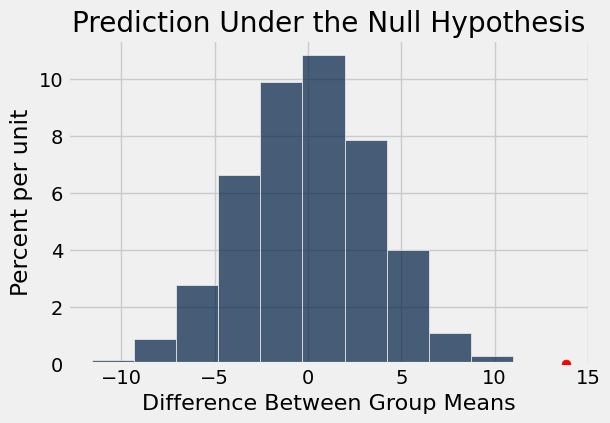

In [29]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');
plots.scatter(observed_difference, 0, color='red', s=40, zorder=3)

**Discussion Question 22:** How does the observed test statistic compare to the distribution of the statistic under the null hypothesis? 

**Discussion Question 23:** Which hypothesis does the data best support?

**Discussion Question 24:** In your own words, describe the effect of cultural burning on basket-worthy stem growth, as supported by the data.

# How things are now...

Despite the now widespread acknowledgement of the wisdom of cultural burning, these practices are restricted due USDA Forest Service funding and staff reductions, threatened and endangered wildlife being protected in certain seasons, burn restrictions during major wildfire events, and air quality regulations that constrain available burn days. 

Basketweavers also say the departure of supportive USDA Forest Service managers created major set-backs, because they had to re-establish lines of communication with new staff and inform them about their basketry materials and fire treatment
needs. So even with the federal governments increased fuel reduction treatments throughout this region basketweavers and Tribal members often were not informed about the schedules or locations of understory mechanical treatments and broadcast burns, and would miss opportunities to gather hazelnut stems. 

Efforts within the USDA Forest Service known as the ‘Shared Stewardship’ initiative seek to address several of these constraints.

In the meantime basketweavers have been coming up with their own creative solutions to stimulate basket-worthy stem growth on hazelnut shrubs. The figure below shows different types of treatments now being used: (A) manual cutting of the shrub; (B) small pile burn on an indivual shrub; (C) propone torching of a shrub (D) the traditional broadcast burn.
<img src="Treatments.jpg" alt="drawing" width="400"/>

All of these treatments increase basket-worthy stem growth, where the ones that use fire are the most effective. You can read more about the details in [the paper](https://www.sciencedirect.com/science/article/pii/S0378112719306826) if you like.


At home, watch [this video](https://www.youtube.com/watch?v=QQfrQyb4yw4) about the *Land Back* movement.
Come prepared to discuss Discussion Question 25 in our next class meeting.

 **Discussion Question 25:** What do you think about the *Land Back* movement?

If you want to read more, here is a [news article](https://www.npr.org/2020/08/24/899422710/to-manage-wildfire-california-looks-to-what-tribes-have-known-all-along) that also covered this topic. (If you are having trouble getting the link to work you can also download the article by clicking [here](https://humboldt.cloudbank.2i2c.cloud/hub/user-redirect/git-sync?repo=https://github.com/bludka/materials-sp22&urlpath=tree/materials-sp22/lectures/Native_American_Burning_And_California_s_Wildfire_Strategy_NPR.pdf).)